In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing data from csv file
car_data = pd.read_csv("car-prices-data.csv")

In [3]:
car_data

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [5]:
# Visualizing Data
%matplotlib inline

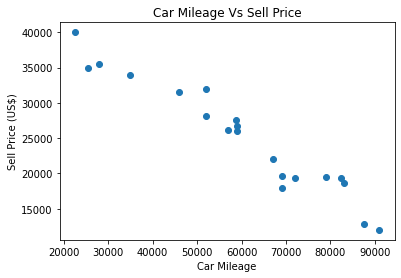

In [8]:
# Car Milage Vs Sell Price
plt.scatter(car_data['Mileage'],car_data['Sell Price($)'])
plt.title("Car Mileage Vs Sell Price")
plt.xlabel("Car Mileage")
plt.ylabel("Sell Price (US$)")
plt.show()

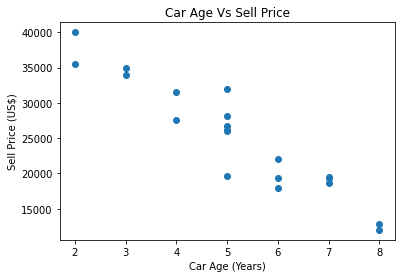

In [11]:
# Car Age Vs Sell Price
plt.scatter(car_data['Age(yrs)'],car_data['Sell Price($)'])
plt.title("Car Age Vs Sell Price")
plt.xlabel("Car Age (Years)")
plt.ylabel("Sell Price (US$)")
plt.show()

In [12]:
# Independent Variables
X = car_data[['Mileage','Age(yrs)']]
X

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [13]:
# Dependent Variable
y = car_data['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     26750
6     32000
7     19300
8     12000
9     22000
10    18700
11    19500
12    26000
13    27500
14    19400
15    35000
16    35500
17    19700
18    12800
19    28200
Name: Sell Price($), dtype: int64

In [15]:
# Splitting Data into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [24]:
print("X Training Data Size : {}".format(X_train.shape))
print("X Testing Data Size  : {}".format(X_test.shape))
print()
print("y Training Data Size : {}".format(y_train.shape))
print("y Testing Data Size  : {}".format(y_test.shape))

X Training Data Size : (16, 2)
X Testing Data Size  : (4, 2)

y Training Data Size : (16,)
y Testing Data Size  : (4,)


In [25]:
# Creating Linear Regression Object
from sklearn import linear_model
cp_model = linear_model.LinearRegression()

In [30]:
# Training Model
cp_model.fit(X_train,y_train)

LinearRegression()

In [31]:
# Model Coefficients
print("Car Mileage Coefficient : {:.4f}".format(cp_model.coef_[0]))
print("Car Age Coefficient     : {:.4f}".format(cp_model.coef_[1]))

Car Mileage Coefficient : -0.3385
Car Age Coefficient     : -213.6971


In [32]:
# Model Intercept
print("Model Intercept : {:.4f}".format(cp_model.intercept_))

Model Intercept : 46706.4641


In [34]:
# Testing Model
car_price_predicted = cp_model.predict(X_test)
car_price_predicted

array([22742.4884206 , 38662.04985   , 26341.5277739 , 22065.41996895])

In [35]:
# Model Score : Training Data
print("Model Score : {:.4f}".format(cp_model.score(X_train,y_train)))

Model Score : 0.9346


In [36]:
# Model Score : Testing Data
print("Model Score : {:.4f}".format(cp_model.score(X_test,y_test)))

Model Score : 0.9312


In [40]:
# Results
result = pd.concat([X_test,y_test],axis="columns")
result['Predicted Sell Price($)'] = car_price_predicted
result

,Mileage,Age(yrs),Sell Price($),Predicted Sell Price($)
9,67000,6,22000,22742.488421
3,22500,2,40000,38662.049850
2,57000,5,26100,26341.527774
0,69000,6,18000,22065.419969


In [41]:
# Exporting Results as CSV file
result.to_csv("results.csv")

In [42]:
# Saving Model as Binary File
import joblib
joblib.dump(cp_model,"cp-model")

['cp-model']